In [1]:
### Import all necessary modules
import geopandas as gpd
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

In [2]:
### Load in CSV with state names, covid deaths, covid cases, and gini index
data = pd.read_csv('COVID19_state.csv')

### Use pandas to read csv data into a DataFrame 
COVID_df = pd.DataFrame(data, columns=['State','Infected','Deaths','Gini'])

### Add a new column to dataFrame and calculate COVID death rate (%)
COVID_df['DeathRate'] = (COVID_df.Deaths / COVID_df.Infected)*100

### Read in state boundaries shapefile as a geoDataFrame
states = gpd.read_file('cb_2018_us_state_20m.shp')
states = states.rename(columns={'NAME':'State'})

### Merge dataFrame with COVID information into the states GeoDataFrame by state name 
states_allData = states.merge(COVID_df, on = 'State')

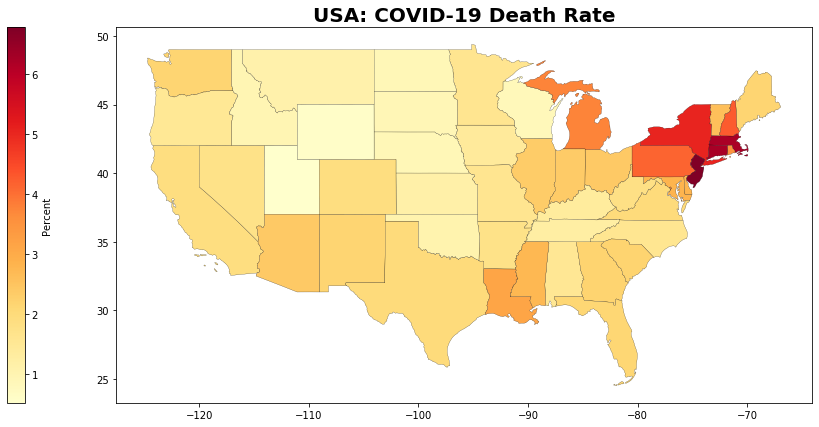

In [3]:
### Create a color map showing the percentage of COVID deaths per state
lower48 = states_allData[(states_allData.State != "Alaska") & (states_allData.State != 'Hawaii') & (states_allData.State != 'Puerto Rico')] 
fig, ax = plt.subplots(1, figsize=(16, 12))
lower48.plot(column="DeathRate",figsize=(16,12), ax=ax, cmap='YlOrRd',edgecolor='black', linewidth=0.2)

vmin = lower48["DeathRate"].min()
vmax = lower48["DeathRate"].max()

plt.title("USA: COVID-19 Death Rate",fontdict={'fontsize':20, 'fontweight':'bold'})
    
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax),cmap='YlOrRd')
divider = make_axes_locatable(ax)
cax = divider.append_axes("left", size="2%", pad = 0.05)
fig.colorbar(sm,label='Percent',cax=cax,)

plt.savefig("Figure1",dpi=400,bbox_inches='tight')

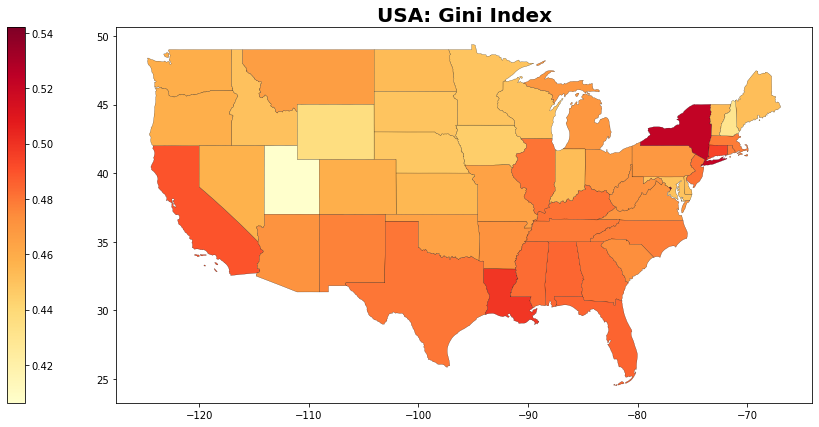

In [4]:
### Create a color map showing the Gini Index per state
lower48 = states_allData[(states_allData.State != "Alaska") & (states_allData.State != 'Hawaii') & (states_allData.State != 'Puerto Rico')] 
fig, ax = plt.subplots(1, figsize=(16, 12))
lower48.plot(column="Gini",figsize=(16,12), ax=ax, cmap='YlOrRd',edgecolor='black', linewidth=0.2)

vmin = lower48["Gini"].min()
vmax = lower48["Gini"].max()

plt.title("USA: Gini Index",fontdict={'fontsize':20, 'fontweight':'bold'})
    
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax),cmap='YlOrRd')
divider = make_axes_locatable(ax)
cax = divider.append_axes("left", size="2%", pad = 0.05)
fig.colorbar(sm,cax=cax,)

plt.savefig("Figure2",dpi=400,bbox_inches='tight')

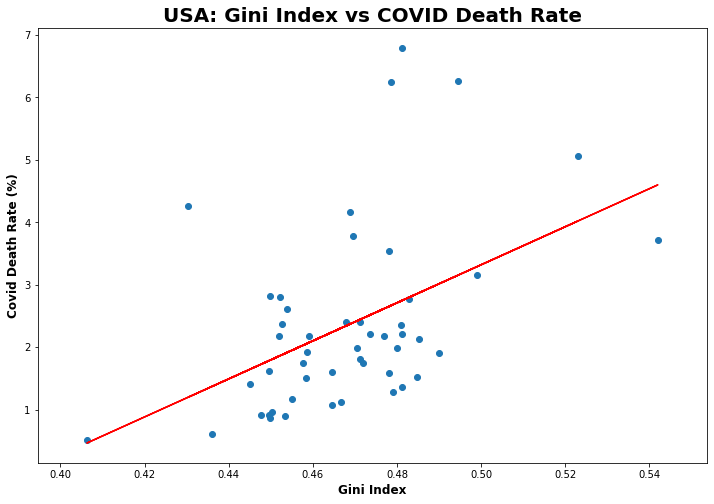

In [5]:
### Create a scatterplot with trend line comparing the death rate and the Gini index 
fig = plt.figure(3, figsize=(12,8))

# Create Initial Scatterplot
x = lower48.Gini
y = lower48.DeathRate

plt.scatter(x, y)

# Calculate trend line using numpy and plot the line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'-r')

# Adjust visual appearence and labels of plot, export plot
plt.xlabel('Gini Index', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.ylabel('Covid Death Rate (%)', fontdict={'fontsize':12, 'fontweight':'bold'})

plt.title("USA: Gini Index vs COVID Death Rate",fontdict={'fontsize':20, 'fontweight':'bold'})

plt.savefig("Figure3",dpi=400,bbox_inches='tight')

In [6]:
### Test the correlation between the Gini Index and the Covid Death Rate

# Prepare Variables
x = lower48.Gini
y = lower48.DeathRate

# Summarize Variables
print('Data Summary:')
print('x: mean=%.3f stdv=%.3f' % (np.mean(x), np.std(x)))
print('y: mean=%.3f stdv=%.3f' % (np.mean(y), np.std(y)))
print('------------------------------')

# Calculate Pearson's r corelation coefficient & P-value
print("Statistical Analysis:")
r = scipy.stats.pearsonr(x, y)
print("Correlation Coefficient=",r[0])
print("P-Value =",r[1])

Data Summary:
x: mean=0.468 stdv=0.022
y: mean=2.340 stdv=1.430
------------------------------
Statistical Analysis:
Correlation Coefficient= 0.4655689816742987
P-Value = 0.0007490103803171913
